In [5]:
#!pip install python-dotenv
#!pip install openai
#!pip install --upgrade langchain

  Using cached python_dotenv-1.0.0-py3-none-any.whl (19 kB)


In [2]:
import openai
import langchain

In [3]:
import os
import openai

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
openai.api_key = os.environ['OPENAI_API_KEY']

In [4]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory


##  ConversationBufferMemory

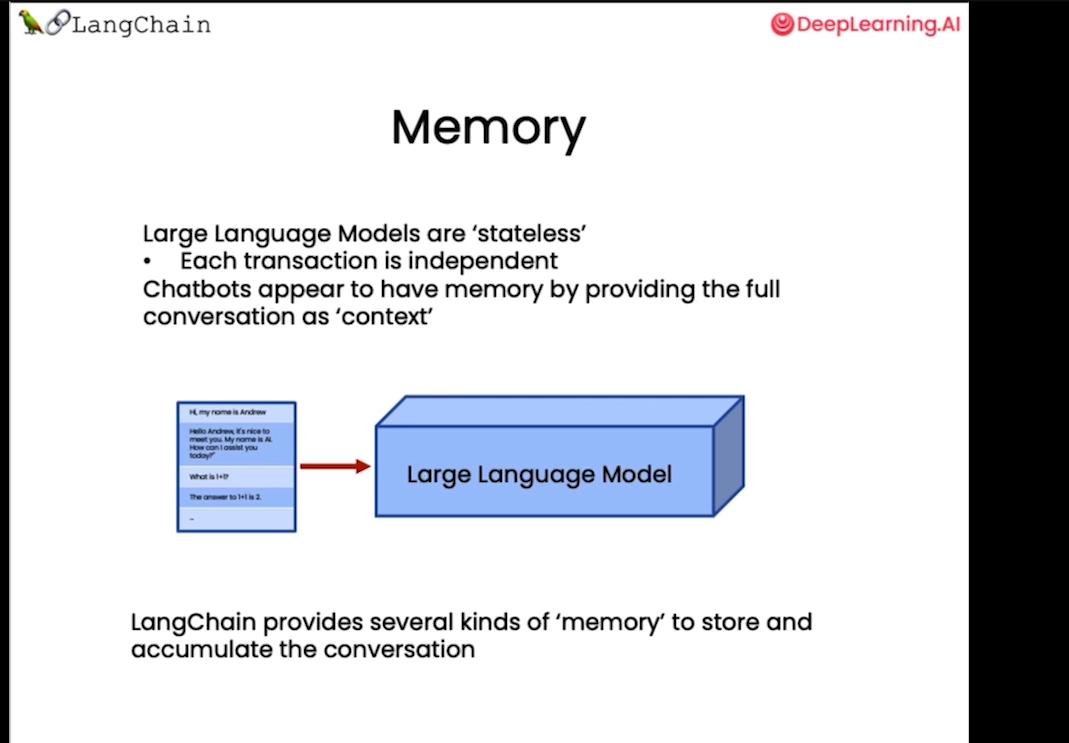

ChatGPT(GPT-3.5) can act as a chatbot with memory because it will provide the full (previous and current) conversation as context to model which can consume more costs as it will consume moretokens . So we need buffermemory of Langchain where we can store the onversation without passing full conversation as context

In [4]:
llm = ChatOpenAI(temperature=0.0)
memory = ConversationBufferMemory()
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=False
)

In [5]:
conversation.predict(input="Hi, my name is Sumit")

"Hello Sumit, it's nice to meet you. My name is AI. How can I assist you today?"

In [6]:
conversation.predict(input="What is 1+1?")

'The answer to 1+1 is 2.'

In [7]:
conversation.predict(input="What is my name?")

'Your name is Sumit, as you mentioned earlier.'

In [8]:
llm = ChatOpenAI(temperature=0.0)
memory = ConversationBufferMemory()
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
)

In [9]:
conversation.predict(input="Hi, my name is Sumit")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, my name is Sumit
AI:

> Finished chain.


"Hello Sumit, it's nice to meet you. My name is AI. How can I assist you today?"

In [10]:
conversation.predict(input="What is 12+13?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Sumit
AI: Hello Sumit, it's nice to meet you. My name is AI. How can I assist you today?
Human: What is 12+13?
AI:

> Finished chain.


'12+13 is equal to 25.'

In [11]:
conversation.predict(input="Please tell my name?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Sumit
AI: Hello Sumit, it's nice to meet you. My name is AI. How can I assist you today?
Human: What is 12+13?
AI: 12+13 is equal to 25.
Human: Please tell my name?
AI:

> Finished chain.


'Your name is Sumit, as you mentioned earlier.'

In [12]:
print(memory.buffer)

Human: Hi, my name is Sumit
AI: Hello Sumit, it's nice to meet you. My name is AI. How can I assist you today?
Human: What is 12+13?
AI: 12+13 is equal to 25.
Human: Please tell my name?
AI: Your name is Sumit, as you mentioned earlier.


In [13]:
memory.load_memory_variables({})

{'history': "Human: Hi, my name is Sumit\nAI: Hello Sumit, it's nice to meet you. My name is AI. How can I assist you today?\nHuman: What is 12+13?\nAI: 12+13 is equal to 25.\nHuman: Please tell my name?\nAI: Your name is Sumit, as you mentioned earlier."}

In [14]:
memory1 = ConversationBufferMemory()

memory1.save_context({"input": "Hi"}, 
                    {"output": "What's up"})

In [15]:
print(memory1.buffer)

Human: Hi
AI: What's up


In [16]:
memory1.load_memory_variables({})

{'history': "Human: Hi\nAI: What's up"}

In [17]:
memory1.save_context({"input": "Not much, just hanging"}, 
                    {"output": "Cool"})

In [18]:
print(memory1.buffer)

Human: Hi
AI: What's up
Human: Not much, just hanging
AI: Cool


In [29]:
print(memory1.load_memory_variables({}))

{'history': "Human: Hi\nAI: What's up\nHuman: Not much, just hanging\nAI: Cool"}


## ConversationBufferWindowMemory

In [19]:
from langchain.memory import ConversationBufferWindowMemory

In [21]:
memory2 = ConversationBufferWindowMemory(k=1)               
# k = 1 means it will only remember just previous converstaion
# k = 2 means it will only remember previous two converstaion

In [22]:
memory2.save_context({"input": "Hi"},
                    {"output": "What's up"})
memory2.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})


In [27]:
memory2.load_memory_variables({})

{'history': 'Human: Not much, just hanging\nAI: Cool'}

In [34]:
llm = ChatOpenAI(temperature=0.0)
memory = ConversationBufferWindowMemory(k=1)
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
)

In [35]:
conversation.predict(input="Hi, my name is Sumit")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, my name is Sumit
AI:

> Finished chain.


"Hello Sumit, it's nice to meet you. My name is AI. How can I assist you today?"

In [36]:
conversation.predict(input="What is 11+11?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Sumit
AI: Hello Sumit, it's nice to meet you. My name is AI. How can I assist you today?
Human: What is 11+11?
AI:

> Finished chain.


'The answer to 11+11 is 22.'

In [37]:
conversation.predict(input="What is my name?")
# It will not give answer becasue it has k = 1



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: What is 11+11?
AI: The answer to 11+11 is 22.
Human: What is my name?
AI:

> Finished chain.


"I'm sorry, I don't have access to that information. Could you please tell me your name?"

## ConversationTokenBufferMemory

In [41]:
!pip install tiktoken

In [5]:
from langchain.memory import ConversationTokenBufferMemory
from langchain.llms import OpenAI
llm = ChatOpenAI(temperature=0.0)

In [6]:
memory = ConversationTokenBufferMemory(llm=llm, max_token_limit=30)
memory.save_context({"input": "AI is what?!"},
                    {"output": "Amazing!"})
memory.save_context({"input": "Backpropagation is what?"},
                    {"output": "Beautiful!"})
memory.save_context({"input": "Chatbots are what?"}, 
                    {"output": "Charming!"})

NotImplementedError: get_num_tokens_from_messages() is not presently implemented for model cl100k_base.See https://github.com/openai/openai-python/blob/main/chatml.md for information on how messages are converted to tokens.

In [ ]:
memory.load_memory_variables({})

In [ ]:
memory = ConversationTokenBufferMemory(llm=llm, max_token_limit=40)
memory.save_context({"input": "AI is what?!"},
                    {"output": "Amazing!"})
memory.save_context({"input": "Backpropagation is what?"},
                    {"output": "Beautiful!"})
memory.save_context({"input": "Chatbots are what?"}, 
                    {"output": "Charming!"})

In [ ]:
memory.load_memory_variables({})

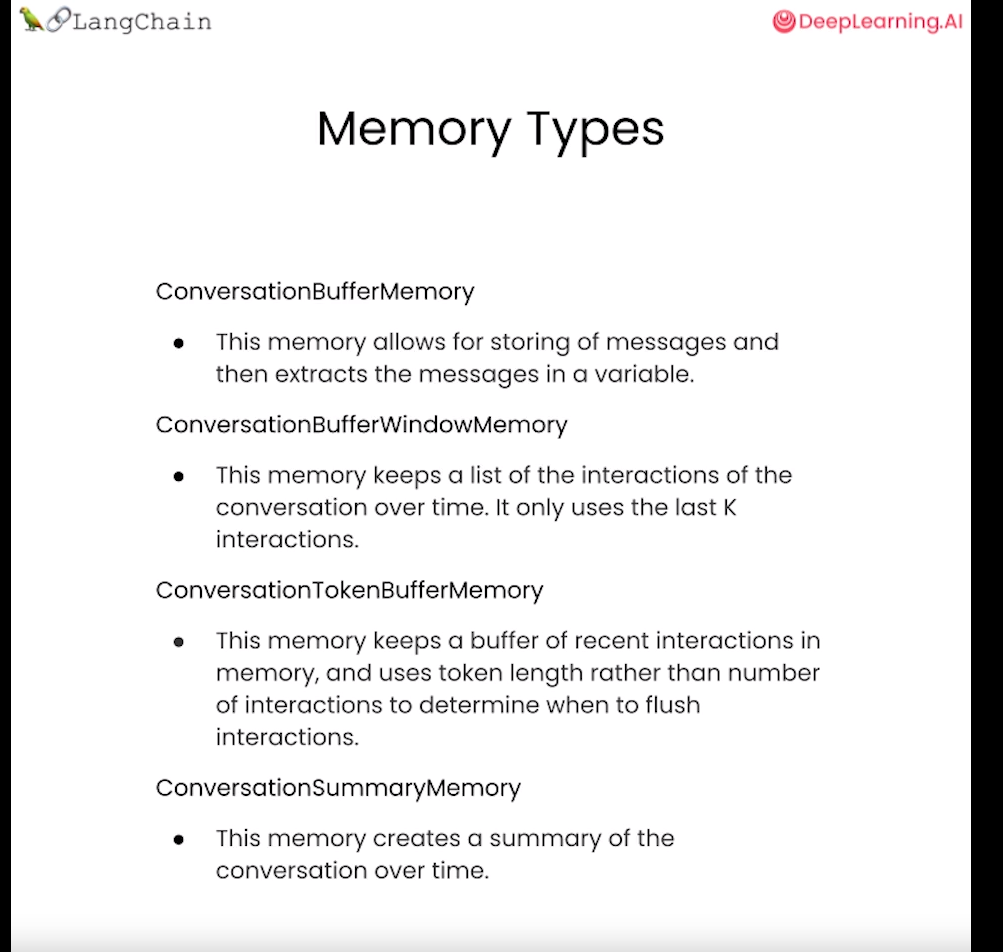

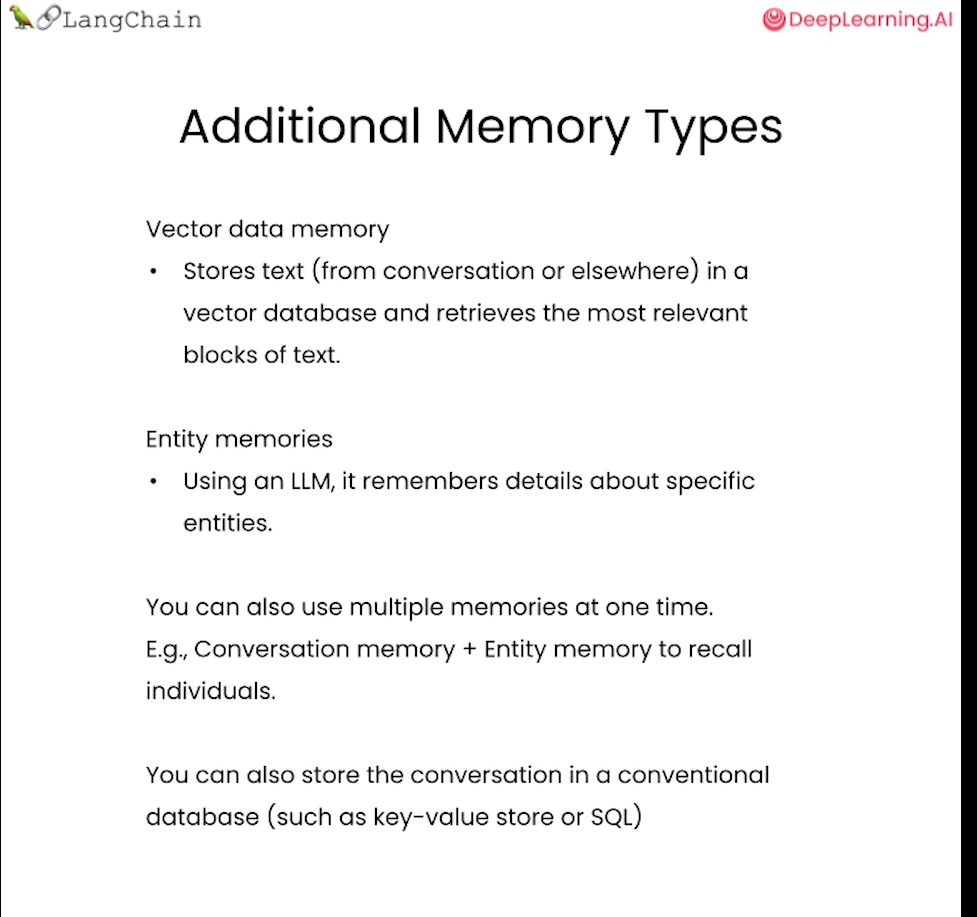

## ConversationSummaryMemory

In [7]:
from langchain.memory import ConversationSummaryBufferMemory


In [8]:
# create a long string
schedule = "There is a meeting at 8am with your product team. \
You will need your powerpoint presentation prepared. \
9am-12pm have time to work on your LangChain \
project which will go quickly because Langchain is such a powerful tool. \
At Noon, lunch at the italian resturant with a customer who is driving \
from over an hour away to meet you to understand the latest in AI. \
Be sure to bring your laptop to show the latest LLM demo."

memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=100)
memory.save_context({"input": "Hello"}, {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})
memory.save_context({"input": "What is on the schedule today?"}, 
                    {"output": f"{schedule}"})

NotImplementedError: get_num_tokens_from_messages() is not presently implemented for model cl100k_base.See https://github.com/openai/openai-python/blob/main/chatml.md for information on how messages are converted to tokens.

In [ ]:
memory.load_memory_variables({})

In [ ]:
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
)

In [ ]:
conversation.predict(input="What would be a good demo to show?")

In [ ]:
memory.load_memory_variables({})